### Implementation

A basic workflow:
1. Define an intensity process $\lambda(t)$. for example:
    - Piecewise constant (different mean rates per hour).
    - Random process (e.g Gaussian)
2. Simulate arrival counts using a Poisson distribution with that random intensity

### Non-Homogeneous Poisson Process
- Extends the Poisson process by making $\lambda(t)$ a deterministic function of time
- Set a fixed schedule of intensities (arrival rates) for different times

In [16]:
import numpy as np

# --- Arrival Cox Process ---
def simulate_cox_process(T=480, dt=1, b_rate=5, m_int=0.0, l_int=0.0, rand_int=2.0, m_dur=60, l_dur=90):
    times = np.arange(0, T, dt)

    # Morning + lunch peaks (baseline intensity)
    baseline = b_rate + m_int*np.exp(-((times-120)**2)/(2*m_dur**2))  
    baseline += l_int*np.exp(-((times-300)**2)/(2*l_dur**2))

    # Add randomness (Gamma distributed intensity)
    stochastic_intensity = np.random.gamma(shape=rand_int, scale=baseline/2)

    # Generate arrivals
    arrivals = []
    for t, lam in zip(times, stochastic_intensity):
        n = np.random.poisson(lam * dt / 60)  # arrivals per step
        arrivals.extend([t] * n)

    return arrivals, times, baseline, stochastic_intensity

arrivals, times, baseline, stochastic_intensity = simulate_cox_process()
print(f"Simulated {len(arrivals)} customer arrivals.")

Simulated 32 customer arrivals.


In [1]:
import numpy as np

def simulate_cox_process (T = 480, dt = 1):
    """
    Simulate a doubly stochastic Poisson process for
    customer arrivals over T minutes.

    T = total time (e.g., 480 minutes = 8 hours)
    dt = time step (minutes)
    """

    times = np.arange(0, T, dt)

    # Example: stochastic intensity (Gaussian around a baseline that varies by time of day)
    baseline = 5 + 10*np.exp(-((times-120)**2)/(2*60**2))  # morning peak around 2 hours
    baseline += 8*np.exp(-((times-300)**2)/(2*90**2))  # lunch peak around 5 hours

    # Add randomness
    stochastic_intensity = np.random.gamma(shape=2, scale=baseline/2)

    # Generate arrivals
    arrivals = []
    for t, lam in zip(times, stochastic_intensity):
        n = np.random.poisson(lam * dt/60)  # per-minute arrivals, scale to per-hour
        arrivals.extend([t]*n)

    return arrivals, times, baseline, stochastic_intensity

arrivals, times, baseline, stochastic_intensity = simulate_cox_process()
print(f"Simulated {len(arrivals)} customer arrivals.")

Simulated 87 customer arrivals.


### Baseline vs. stochastic intensity

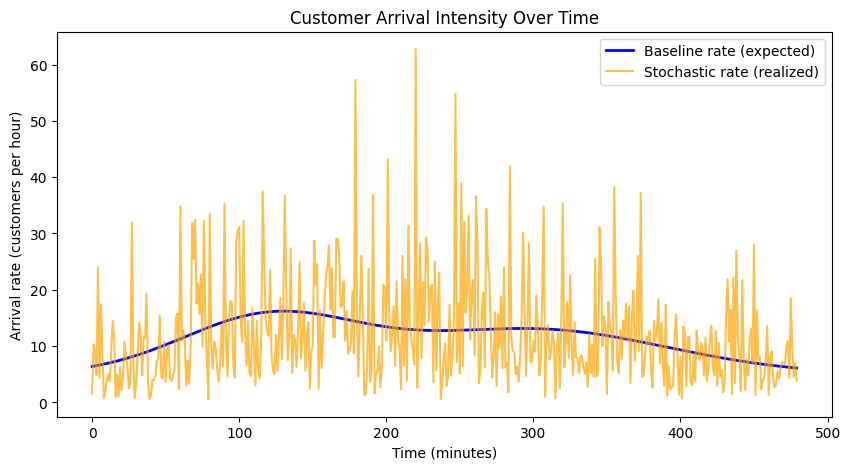

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot baseline (smooth expected shape)
plt.plot(times, baseline, label="Baseline rate (expected)", color="blue", linewidth=2)

# Plot stochastic intensity (random fluctuation)
plt.plot(times, stochastic_intensity, label="Stochastic rate (realized)", color="orange", alpha=0.7)

plt.xlabel("Time (minutes)")
plt.ylabel("Arrival rate (customers per hour)")
plt.title("Customer Arrival Intensity Over Time")
plt.legend()
plt.show()

### Actual arrivals

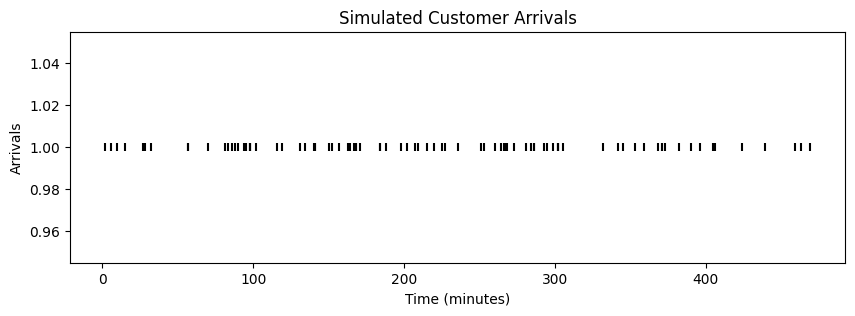

In [3]:
plt.figure(figsize=(10, 3))

# Each dot is a customer
plt.scatter(arrivals, np.ones(len(arrivals)), marker="|", color="black")

plt.xlabel("Time (minutes)")
plt.ylabel("Arrivals")
plt.title("Simulated Customer Arrivals")
plt.show()

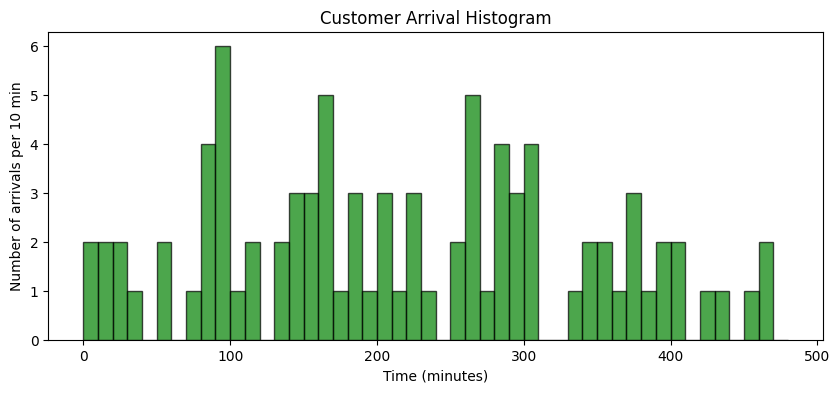

In [4]:
plt.figure(figsize=(10,4))
plt.hist(arrivals, bins=range(0, 481, 10), color="green", alpha=0.7, edgecolor="black")
plt.xlabel("Time (minutes)")
plt.ylabel("Number of arrivals per 10 min")
plt.title("Customer Arrival Histogram")
plt.show()
